In [21]:
import numpy as np
import scipy.signal 
import matplotlib.pyplot as plt
import scipy.io.wavfile
import io 
import IPython
from IPython.display import Image
import math

# 1. CPP function using matlab implementation

In [22]:
def cpp(x, fs, pitch_range): 
    """
    Computes cepstral peak prominence for a given signal 

    Parameters
    -----------
    x: ndarray
        The audio signal
    fs: integer
        The sampling frequency
    pitch_range: list of 2 elements
        The pitch range where a peak is searched for

    Returns
    -----------
    float
        The cepstral peak prominence of the audio signal
    """
    # Quefrency
    frameLen = len(x)
    NFFT = 2**(math.ceil(np.log(frameLen)/np.log(2)))
    quef = np.linspace(0, frameLen/1000, NFFT)

    # Allowed quefrency range
    quef_lim = [int(np.round_(fs/pitch_range[1])), int(np.round_(fs/pitch_range[0]))]
    quef_seq = range(quef_lim[0]-1, quef_lim[1])
    
    # High-pass filtering
    HPfilt_b = [1 - 0.97]
    x = scipy.signal.lfilter( HPfilt_b, 1, x )
    
    # Cepstrum
    frameMat = np.zeros(NFFT)
    frameMat[0: frameLen] = x
    SpecMat = np.abs(np.fft.fft(frameMat))
    SpecdB = 20*np.log10(SpecMat)
    ceps = 20*np.log10(np.abs(np.fft.fft(SpecdB)))
    
    # Finding the peak
    ceps_lim = ceps[quef_seq]
    ceps_max = np.max(ceps_lim)
    max_index = np.argmax(ceps_lim)

    # Normalisation
    ceps_mean = np.mean(ceps_lim)
    p = np.polyfit(quef_seq, ceps_lim,1)
    ceps_norm = np.polyval(p, quef_seq[max_index])

    cpp = ceps_max-ceps_norm
    
    return cpp


# 2. CPP plot function using matlab implementation

In [23]:
def cpp_plot(x, fs, pitch_range): 
    """
    Plots the cepstral peak prominence for a given signal 

    Parameters
    -----------
    x: ndarray
        The audio signal
    fs: integer
        The sampling frequency
    pitch_range: list of 2 elements
        The pitch range where a peak is searched for

    """
    # Quefrency
    frameLen = len(x)
    NFFT = 2**(math.ceil(np.log(frameLen)/np.log(2)))
    quef = np.linspace(0, frameLen/1000, NFFT)

    # Allowed quefrency range
    quef_lim = [int(fs//pitch_range[1]), int(fs//pitch_range[0])]
    quef_seq = range(quef_lim[0]-1, quef_lim[1])
    
    # High-pass filtering
    HPfilt_b = [1 - 0.97]
    x = scipy.signal.lfilter( HPfilt_b, 1, x )
    
    # Cepstrum
    frameMat = np.zeros(NFFT)
    frameMat[0: frameLen] = x
    SpecMat = np.abs(np.fft.fft(frameMat))
    SpecdB = 20*np.log10(SpecMat)
    ceps = 20*np.log10(np.abs(np.fft.fft(SpecdB)))
    
    # Finding the peak
    ceps_lim = ceps[quef_seq]
    ceps_max = np.max(ceps_lim)
    max_index = np.argmax(ceps_lim)

    # Normalisation
    ceps_mean = np.mean(ceps_lim)
    p = np.polyfit(quef_seq, ceps_lim,1)
    ceps_norm = np.polyval(p, quef_seq[max_index])

    cpp = ceps_max-ceps_norm
    
    print('ceps_max: {}'.format(ceps_max))
    print('ceps_norm: {}'.format(ceps_norm))
    print('cpp: {}'.format(cpp))
    
    # Plotting 
    fig, ax = plt.subplots(1,1, figsize=(12,4))
    ax.plot(quef[quef_seq], ceps_lim)
    ax.plot(quef[quef_seq], np.poly1d(p)(quef_seq))
    ax.plot(quef[quef_seq][max_index], ceps_max, marker="o",markeredgecolor="red", markerfacecolor="red")
    ax.plot(quef[quef_seq][max_index], np.poly1d(p)(quef_seq)[max_index], marker="o", markeredgecolor="red", markerfacecolor="red")

    ax.set_xlabel('quefrency(s)')
    ax.set_ylabel('log magnitude(dB)')
    ax.set_title('Cepstrum')


In [24]:
fs, signal = scipy.io.wavfile.read('audio_files/data_input_rainbow.wav')
cpp(x=signal, fs=fs, pitch_range=[60, 333.3])

20.366055253050206

ceps_max: 88.29581888394229
ceps_norm: 67.92976363089208
cpp: 20.366055253050206


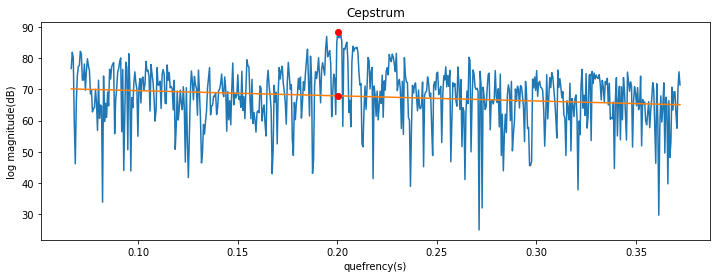

In [25]:
cpp_plot(x=signal, fs=fs, pitch_range=[60, 333.3])

# 3. Examples

## Example 1: rainbow.wav

Using rainbow.wav (from https://github.com/danielmlow/vfp/tree/master/data/input)

In [26]:
IPython.display.Audio("audio_files/data_input_rainbow.wav")

### a) CPP function

ceps_max: 88.29581888394229
ceps_norm: 67.92976363089208
cpp: 20.366055253050206


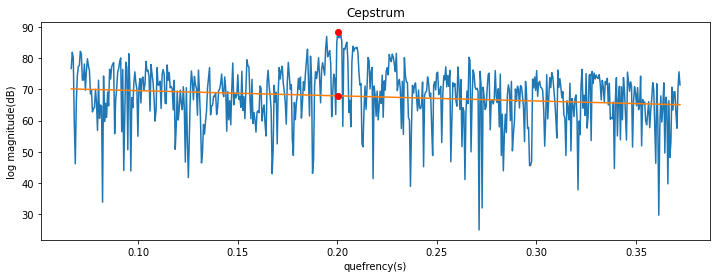

In [27]:
fs, signal = scipy.io.wavfile.read('audio_files/data_input_rainbow.wav')
cpp_plot(x=signal, fs=fs, pitch_range=[60, 333.3])


### b) MATLAB implementation

Using the matlab implementation: <BR>
    <B>CPP = 20.366 dB</B><BR>


In [28]:
Image(url="images/rainbow_m.png", width=800, height=800)

## Example 2: CantinaBand3.wav

In [29]:
IPython.display.Audio("audio_files/CantinaBand3.wav")

### a) CPP function

ceps_max: 96.65140342025424
ceps_norm: 82.75538325180537
cpp: 13.896020168448871


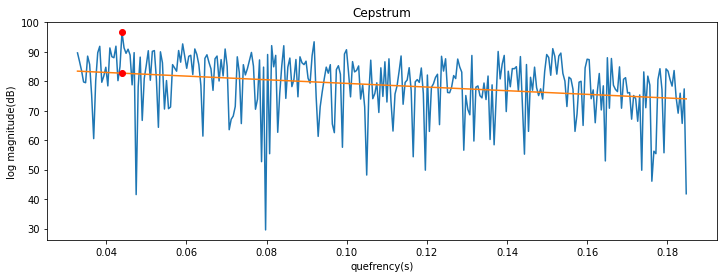

In [30]:
fs, signal = scipy.io.wavfile.read('audio_files/CantinaBand3.wav')
cpp_plot(x=signal, fs=fs, pitch_range=[60, 333.3])

### b) MATLAB implementation

Using the matlab implementation: <BR>
    <B>CPP = 13.944 dB</B><BR>


In [31]:
Image(url="images/CantinaBand3_m.png", width=800, height=800)

## Example 3: StarWars3.wav

Using StarWars3.wav (from https://www2.cs.uic.edu/~i101/SoundFiles/) <BR>


In [32]:
IPython.display.Audio("audio_files/StarWars3.wav")

### a) CPP function

ceps_max: 100.013434805365
ceps_norm: 81.26760135481103
cpp: 18.74583345055396


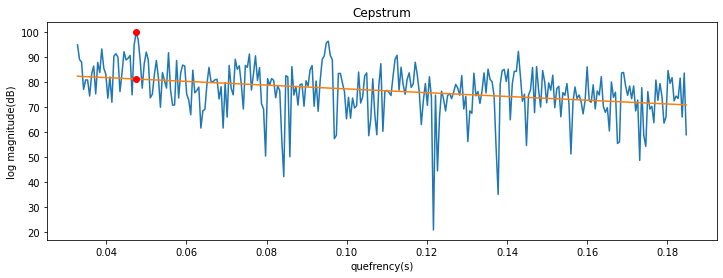

In [33]:
fs, signal = scipy.io.wavfile.read('audio_files/StarWars3.wav')
cpp_plot(x=signal, fs=fs, pitch_range=[60, 333.3])


### b) MATLAB implementation

Using the matlab implementation: <BR>
    <B>CPP = 18.797 dB</B><BR>

In [34]:
Image(url="images/StarWars3_m.png", width=800, height=800)

# 4. Observations

1. The CPP obtained from cpp function is very close to the cpp obtained from the matlab implementation
2. Got an error while hanning in matlab, so not using it for now. <BR>
Error: Requested 66150x66150 (32.6GB) array exceeds maximum array size preference (8.0GB). This might cause MATLAB to become unresponsive.
